In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import random

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df=pd.read_excel("C:\\Users\\KIIT\\Downloads\\Groceries_Sales_data.xlsx",index_col=0)

In [3]:
df.head()

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


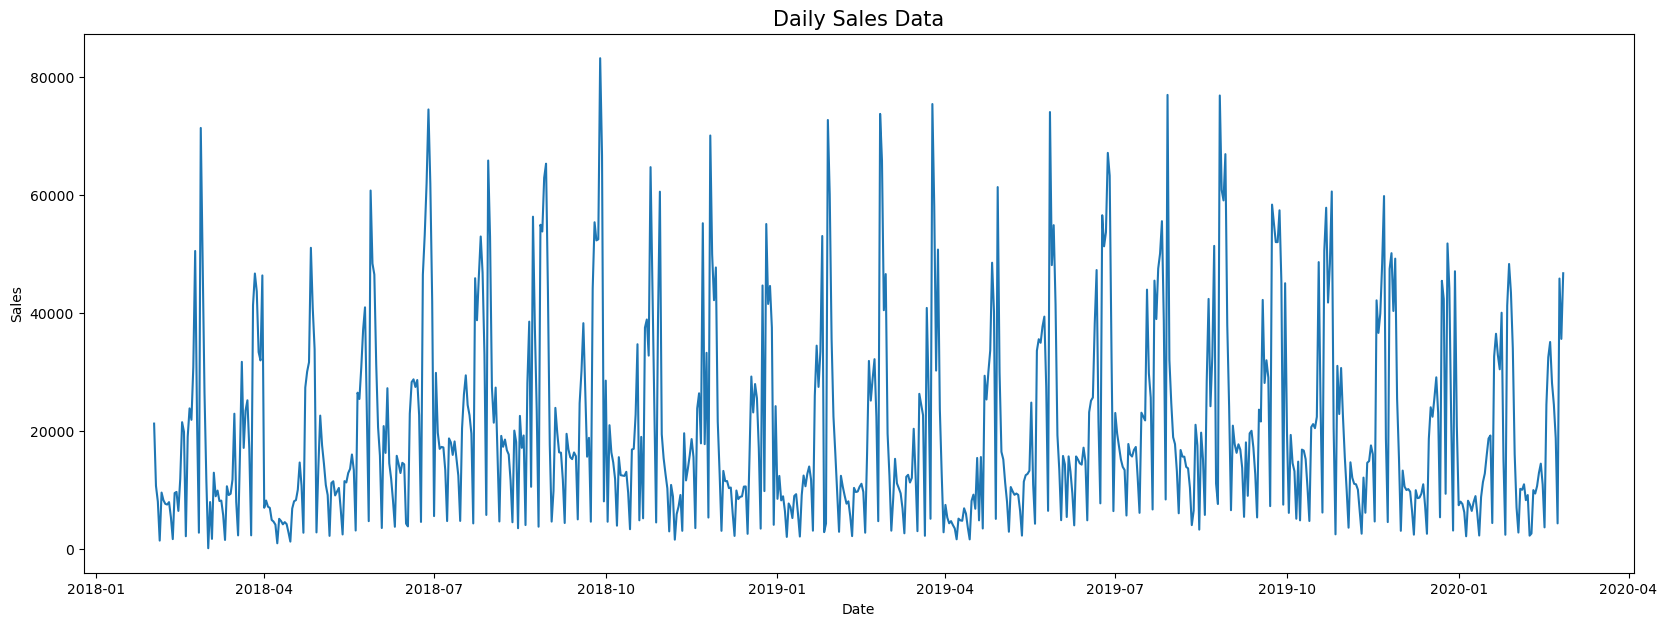

In [4]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="Sales", data=df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()

In [5]:
p=seasonal_decompose(df, model='multiplicative', period=1)

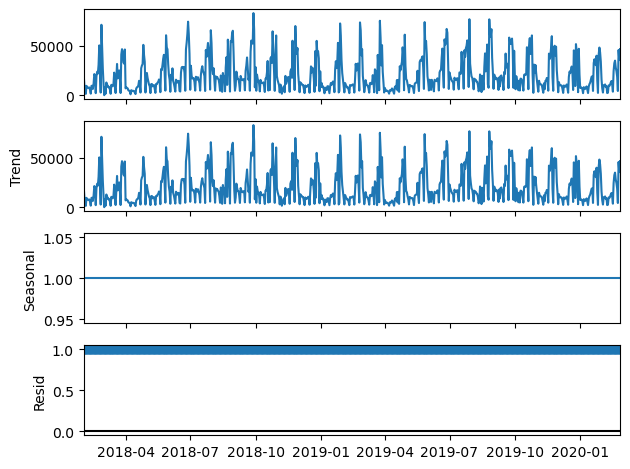

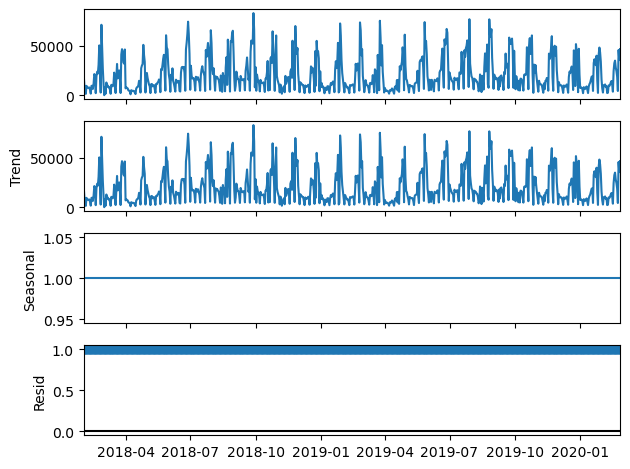

In [6]:
p.plot()

In [7]:
## no seasonal trend

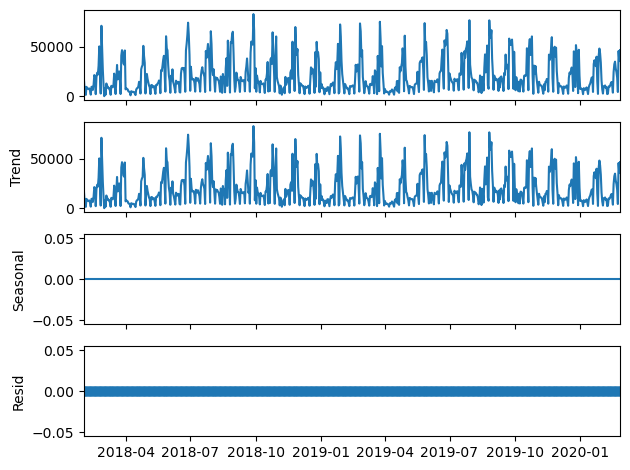

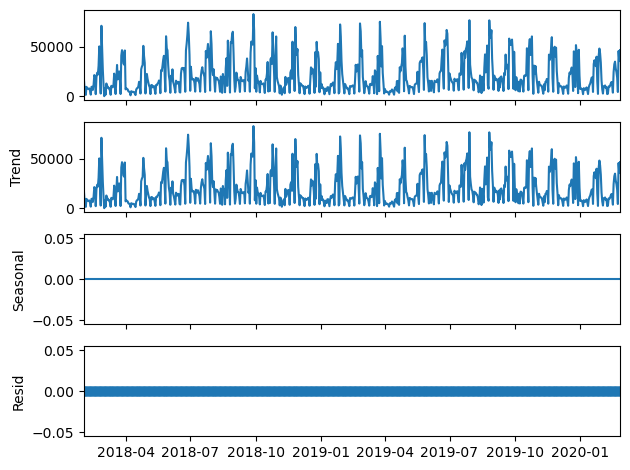

In [8]:
a=seasonal_decompose(df, model='additive', period=1)
a.plot()

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
y = df["Sales"]
y.name = "Sales"

In [11]:
y

Date
2018-02-01    21199.0
2018-02-02    10634.0
2018-02-03     7966.0
2018-02-04     1353.0
2018-02-05     9497.0
               ...   
2020-02-22    18723.1
2020-02-23     4274.9
2020-02-24    45805.7
2020-02-25    35566.3
2020-02-26    46703.0
Name: Sales, Length: 756, dtype: float64

In [12]:
seasonal_df = y.to_frame()
seasonal_df

,Sales
Date,
2018-02-01,21199.0
2018-02-02,10634.0
2018-02-03,7966.0
2018-02-04,1353.0
2018-02-05,9497.0
...,...
2020-02-22,18723.1
2020-02-23,4274.9
2020-02-24,45805.7


In [13]:
seasonal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-02-01 to 2020-02-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2018-02-01 to 2020-02-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [15]:
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,Sales,trend
Date,,
2018-02-01,21199.0,NaN
2018-02-02,10634.0,NaN
2018-02-03,7966.0,NaN
2018-02-04,1353.0,9491.000000
2018-02-05,9497.0,7529.857143
2018-02-06,8207.0,7136.142857
2018-02-07,7581.0,6757.285714
2018-02-08,7471.0,6793.285714
2018-02-09,7878.0,6782.142857


The primary purpose of this code is to smooth the "Sales" data by averaging out the fluctuations over a window of 7 days. This helps in identifying the underlying trend in the sales data by reducing noise and short-term variations.

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


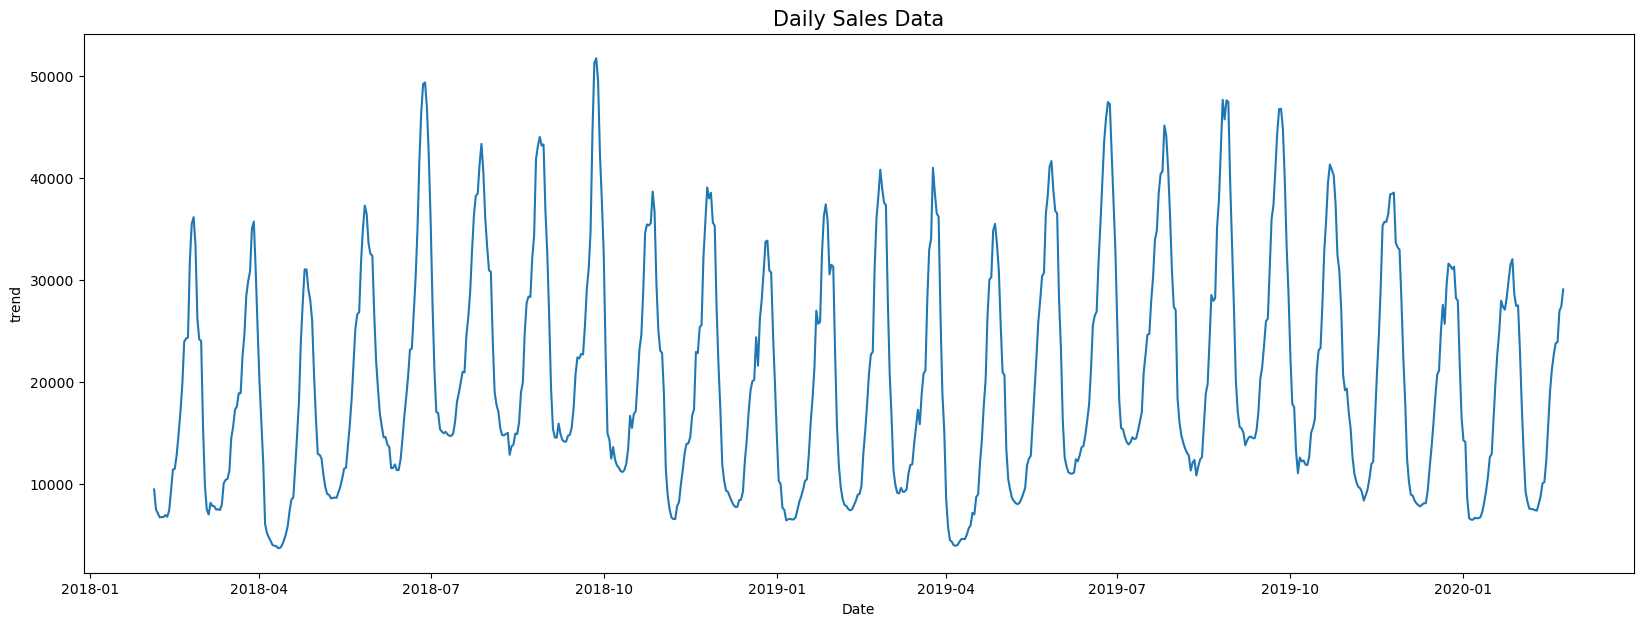

In [16]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="trend", data=seasonal_df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()

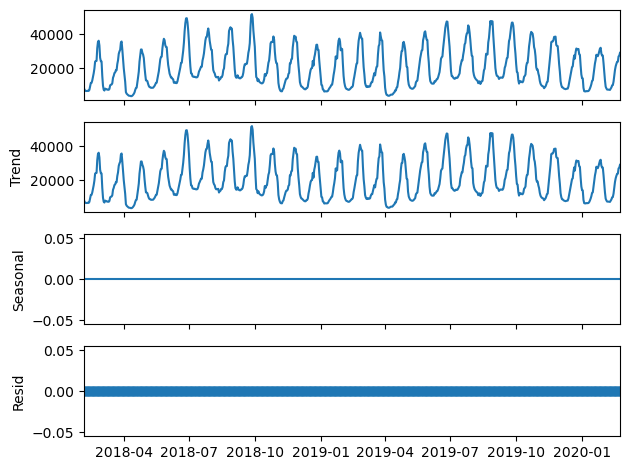

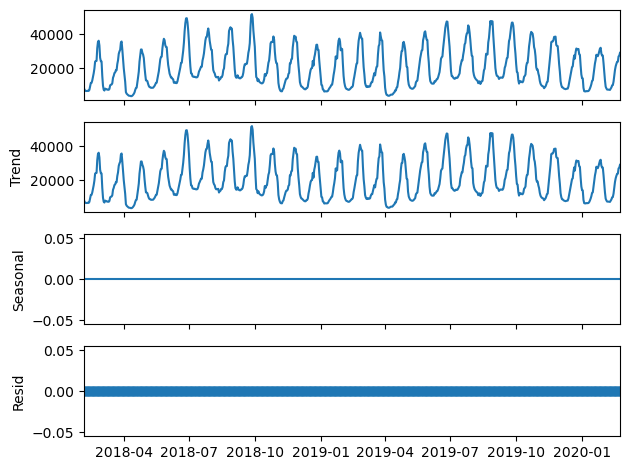

In [17]:
a=seasonal_decompose(seasonal_df.dropna().drop(columns='Sales',axis=1), model='additive', period=1)
a.plot()

In [18]:
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]
seasonal_df.head(10)

,Sales,trend,detrended
Date,,,
2018-02-01,21199.0,NaN,NaN
2018-02-02,10634.0,NaN,NaN
2018-02-03,7966.0,NaN,NaN
2018-02-04,1353.0,9491.000000,-8138.000000
2018-02-05,9497.0,7529.857143,1967.142857
2018-02-06,8207.0,7136.142857,1070.857143
2018-02-07,7581.0,6757.285714,823.714286
2018-02-08,7471.0,6793.285714,677.714286
2018-02-09,7878.0,6782.142857,1095.857143


The primary purpose of detrending is to remove the underlying trend from the data, allowing for the analysis of the residuals. This can be useful for identifying and analyzing patterns, seasonality, or anomalies in the data that are not related to the trend

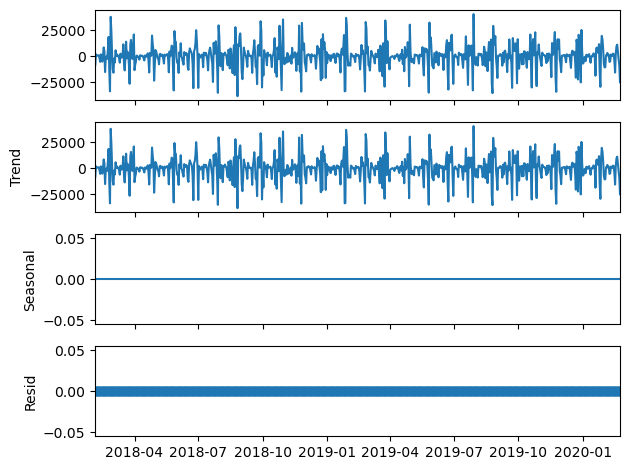

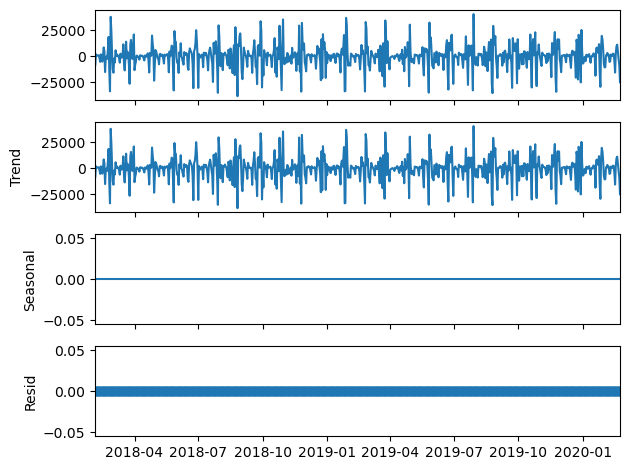

In [19]:
a=seasonal_decompose(seasonal_df.dropna().drop(columns=['Sales','trend'],axis=1), model='additive', period=1)
a.plot()

In [20]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)

In [21]:
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

In [22]:
seasonal_df

,Sales,trend,detrended,month,seasonality
Date,,,,,
2018-02-01,21199.0,NaN,NaN,2,-112.66203
2018-02-02,10634.0,NaN,NaN,2,-112.66203
2018-02-03,7966.0,NaN,NaN,2,-112.66203
2018-02-04,1353.0,9491.000000,-8138.000000,2,-112.66203
2018-02-05,9497.0,7529.857143,1967.142857,2,-112.66203
...,...,...,...,...,...
2020-02-22,18723.1,27416.171429,-8693.071429,2,-112.66203
2020-02-23,4274.9,29082.042857,-24807.142857,2,-112.66203
2020-02-24,45805.7,NaN,NaN,2,-112.66203


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


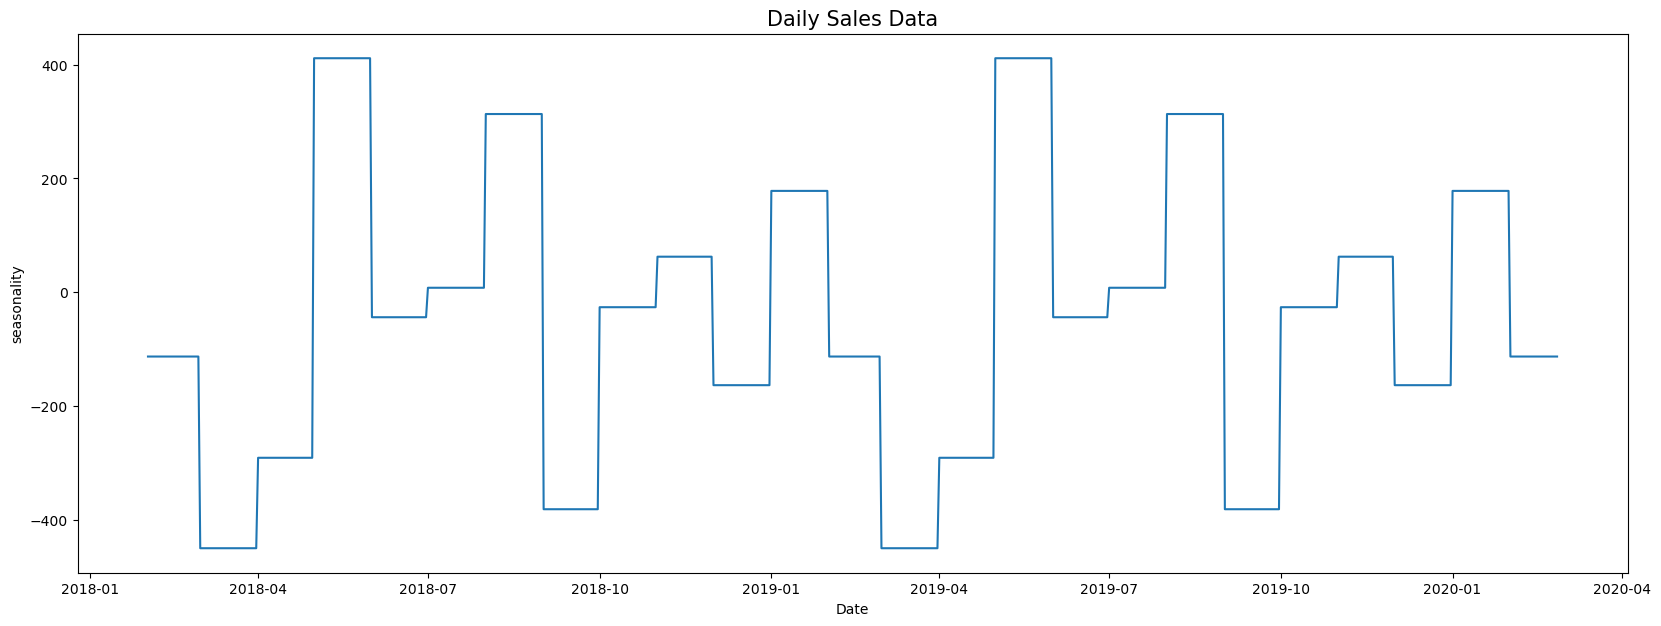

In [23]:
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Date", y="seasonality", data=seasonal_df)
a.set_title("Daily Sales Data",fontsize=15)
plt.show()

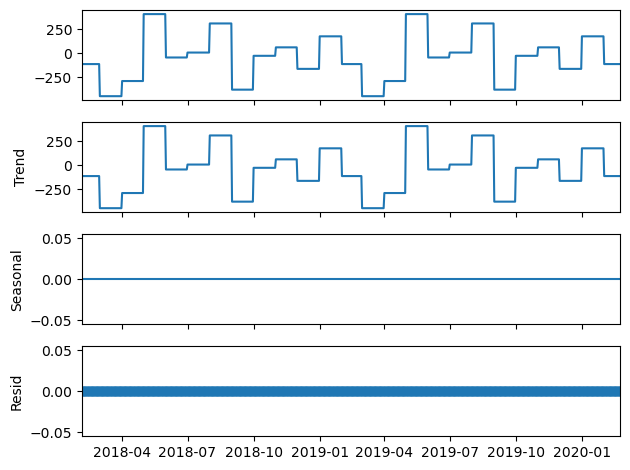

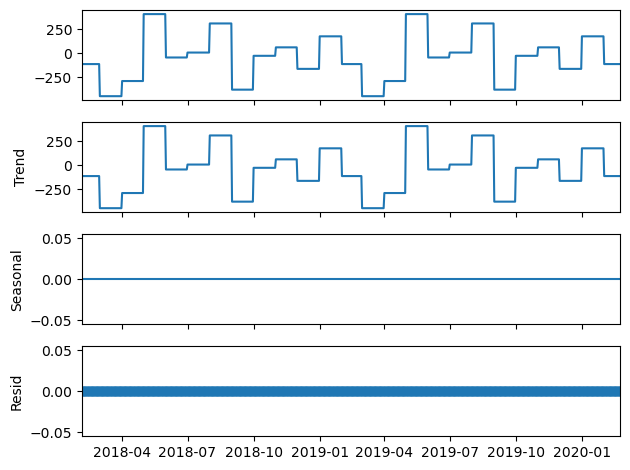

In [24]:
a=seasonal_decompose(seasonal_df.dropna().drop(columns=['Sales','trend','detrended','month'],axis=1), model='additive', period=1)
a.plot()

In [25]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["Sales"].rolling(window=13, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["Sales"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]



In [26]:
seasonal_df.head(10)

,Sales,trend,detrended,month,seasonality,resid
Date,,,,,,
2018-02-01,21199.0,NaN,NaN,2,381.152198,NaN
2018-02-02,10634.0,NaN,NaN,2,381.152198,NaN
2018-02-03,7966.0,NaN,NaN,2,381.152198,NaN
2018-02-04,1353.0,NaN,NaN,2,381.152198,NaN
2018-02-05,9497.0,NaN,NaN,2,381.152198,NaN
2018-02-06,8207.0,NaN,NaN,2,381.152198,NaN
2018-02-07,7581.0,8287.230769,-706.230769,2,381.152198,-1087.382967
2018-02-08,7471.0,7147.930769,323.069231,2,381.152198,-58.082967
2018-02-09,7878.0,7237.546154,640.453846,2,381.152198,259.301648


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

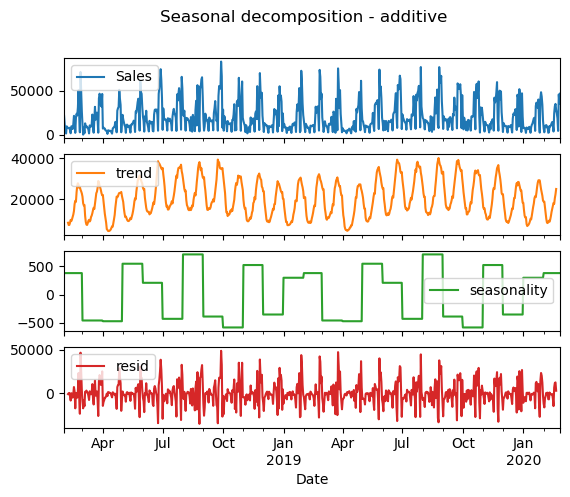

In [27]:
seasonal_df.loc[:, ["Sales", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - additive")

In [28]:
df=df.reset_index(['Date'])

In [29]:


df_copy = df.copy()

df_copy['date'] = df['Date']
df_copy['month'] = df_copy['date'].dt.strftime('%B')
df_copy['year'] = df_copy['date'].dt.strftime('%Y')
df_copy['dayofweek'] = df_copy['date'].dt.strftime('%A')
df_copy['quarter'] = df_copy['date'].dt.quarter
df_copy['dayofyear'] = df_copy['date'].dt.dayofyear
df_copy['dayofmonth'] = df_copy['date'].dt.day


In [30]:
df_copy.head()

,Date,Sales,date,month,year,dayofweek,quarter,dayofyear,dayofmonth
0,2018-02-01,21199.0,2018-02-01,February,2018,Thursday,1,32,1
1,2018-02-02,10634.0,2018-02-02,February,2018,Friday,1,33,2
2,2018-02-03,7966.0,2018-02-03,February,2018,Saturday,1,34,3
3,2018-02-04,1353.0,2018-02-04,February,2018,Sunday,1,35,4
4,2018-02-05,9497.0,2018-02-05,February,2018,Monday,1,36,5


In [31]:
week_day_Aggregated = pd.DataFrame(df_copy.groupby("dayofweek")["Sales"].sum())

In [32]:
week_day_Aggregated

,Sales
dayofweek,
Friday,2531517.8
Monday,2965947.8
Saturday,1724051.0
Sunday,422285.8
Thursday,2668571.6
Tuesday,2701991.0
Wednesday,2452164.6


<Axes: xlabel='dayofweek', ylabel='Sales'>

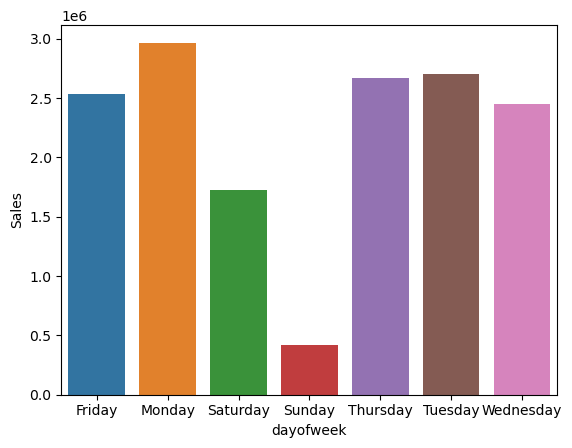

In [33]:
sns.barplot(data=week_day_Aggregated,x=week_day_Aggregated.index,y="Sales",dodge=False)


In [34]:
month=pd.DataFrame(df_copy.groupby('month')['Sales'].sum()).reset_index().sort_values('Sales')

In [35]:
month

,month,Sales
0,April,791067.5
4,January,1078525.2
2,December,1098190.2
7,March,1108843.2
8,May,1245062.8
9,November,1255462.1
10,October,1378177.3
6,June,1435693.4
3,February,1450792.3
11,September,1521247.0


<Axes: xlabel='month', ylabel='Sales'>

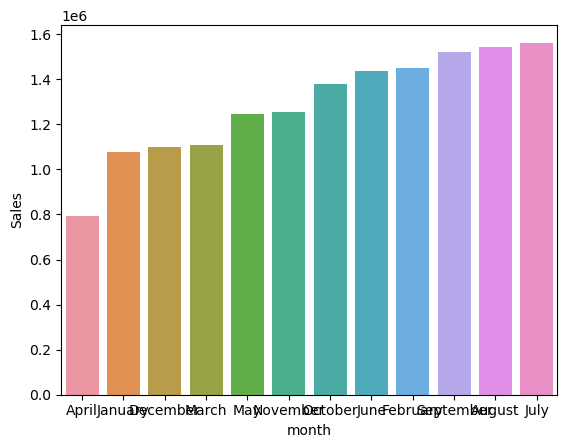

In [36]:
sns.barplot(data=month,x="month",y="Sales")

<Axes: xlabel='year', ylabel='Sales'>

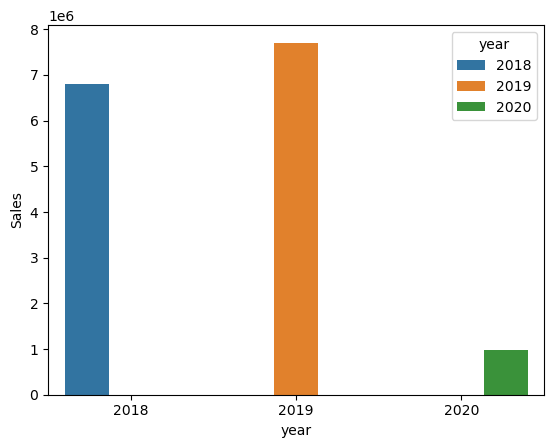

In [37]:
yearAggregated = pd.DataFrame(df_copy.groupby("year")["Sales"].sum()).reset_index()
sns.barplot(data=yearAggregated,x="year",y="Sales",hue='year')

In [38]:
X = df_copy[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
y = df['Sales']

In [39]:
df=df.rename(columns={'Date':'ds','Sales':'y'})
df.tail()

,ds,y
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3
755,2020-02-26,46703.0


In [40]:
end_date = '2019-12-31'
X_tr = df.loc[df['ds'] <= end_date]
X_tst = df.loc[df['ds'] > end_date]

In [41]:
model =Prophet()
model.fit(X_tr)

10:46:48 - cmdstanpy - INFO - Chain [1] start processing
10:46:49 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future = model.make_future_dataframe(periods=57, freq='D')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-02-01,22916.532538,4526.879722,43473.397621
1,2018-02-02,21608.063708,2173.451021,42454.523267
2,2018-02-03,14077.503808,-5182.950115,33125.230023
3,2018-02-04,1674.445972,-17395.067726,20810.610769
4,2018-02-05,25532.213692,6595.881873,45114.418706


periods=57: Specifies the number of future periods to generate. In this case, it generates 57 days into the future.
freq='D': Specifies the frequency of the periods. 'D' stands for daily frequency

In [43]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-02-01,18408.388752,4526.879722,43473.397621,18408.388752,18408.388752,4508.143786,4508.143786,4508.143786,4508.143786,4508.143786,4508.143786,0.0,0.0,0.0,22916.532538
1,2018-02-02,18415.181585,2173.451021,42454.523267,18415.181585,18415.181585,3192.882123,3192.882123,3192.882123,3192.882123,3192.882123,3192.882123,0.0,0.0,0.0,21608.063708
2,2018-02-03,18421.974418,-5182.950115,33125.230023,18421.974418,18421.974418,-4344.470610,-4344.470610,-4344.470610,-4344.470610,-4344.470610,-4344.470610,0.0,0.0,0.0,14077.503808
3,2018-02-04,18428.767251,-17395.067726,20810.610769,18428.767251,18428.767251,-16754.321279,-16754.321279,-16754.321279,-16754.321279,-16754.321279,-16754.321279,0.0,0.0,0.0,1674.445972
4,2018-02-05,18435.560084,6595.881873,45114.418706,18435.560084,18435.560084,7096.653608,7096.653608,7096.653608,7096.653608,7096.653608,7096.653608,0.0,0.0,0.0,25532.213692


yhat: The predicted value (the forecast)

yhat_lower----This column contains the lower bound of the prediction interval, representing the lowest value within the range of uncertainty for the forecast.

In [44]:
print("Trend Analysis:")
print(f"Overall Trend: {forecast['trend'].iloc[-1]:.2f}")
print(f"Trend Lower Bound: {forecast['trend_lower'].iloc[-1]:.2f}")
print(f"Trend Upper Bound: {forecast['trend_upper'].iloc[-1]:.2f}")

Trend Analysis:
Overall Trend: 23537.66
Trend Lower Bound: 23537.65
Trend Upper Bound: 23537.66


In [62]:
df.head()

,ds,y,lag_1,rolling_mean_3,expanding_mean
0,2018-02-01,21199.0,NaN,NaN,21199.000000
1,2018-02-02,10634.0,21199.0,NaN,15916.500000
2,2018-02-03,7966.0,10634.0,13266.333333,13266.333333
3,2018-02-04,1353.0,7966.0,6651.000000,10288.000000
4,2018-02-05,9497.0,1353.0,6272.000000,10129.800000


In [63]:
df.drop(columns=['lag_1', 'rolling_mean_3', 'expanding_mean'], axis=1)

,ds,y
0,2018-02-01,21199.0
1,2018-02-02,10634.0
2,2018-02-03,7966.0
3,2018-02-04,1353.0
4,2018-02-05,9497.0
...,...,...
751,2020-02-22,18723.1
752,2020-02-23,4274.9
753,2020-02-24,45805.7
754,2020-02-25,35566.3


In [64]:
future_2 = model.make_future_dataframe(periods=60)
forecast_2 = model.predict(future_2)
forecast_2[['ds', 'yhat']].tail(5)

,ds,yhat
754,2020-02-25,27883.944008
755,2020-02-26,25485.684234
756,2020-02-27,28052.593674
757,2020-02-28,26744.126646
758,2020-02-29,19213.568547


In [65]:
X_tst_forecast = model.predict(X_tst)
X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28005.031229,8040.412192,46842.740184
51,2020-02-21,26696.564201,9048.717350,45348.341153
52,2020-02-22,19166.006102,-203.215105,37545.828912
53,2020-02-23,6762.950069,-13108.774558,26203.593397
54,2020-02-24,30620.719591,11358.846391,50156.030949
55,2020-02-25,27883.944008,10222.469723,47070.769836
56,2020-02-26,25485.684234,5788.591564,43393.593594


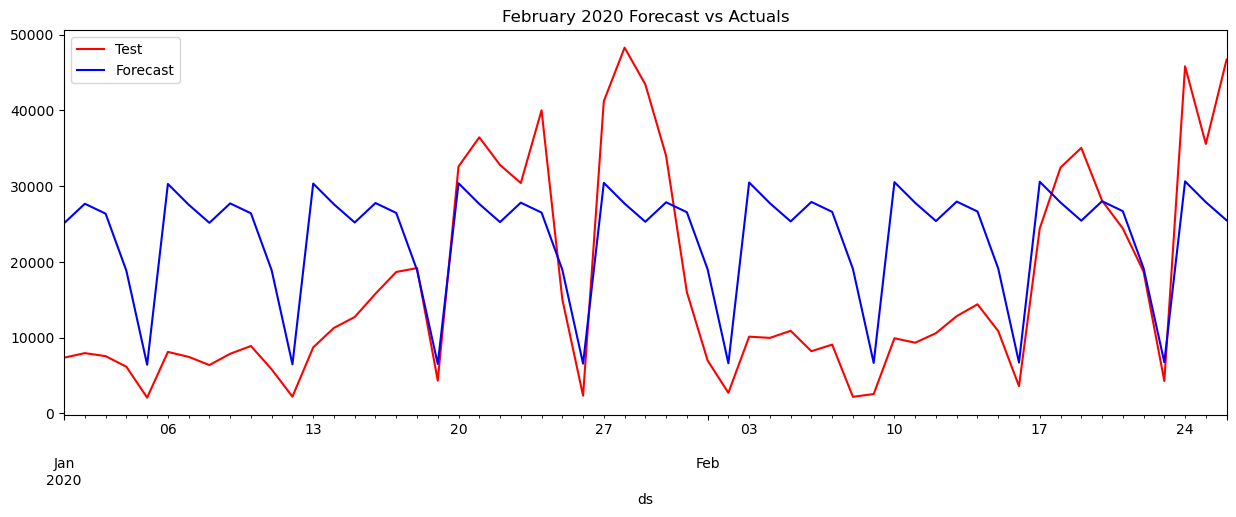

In [66]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Test', ax=ax)
X_tst_forecast.plot(kind='line',x='ds',y='yhat', color='blue',label='Forecast', ax=ax)
plt.title('February 2020 Forecast vs Actuals')
plt.show()

In [67]:
mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
print("MAPE",mape)

MAPE 1.2893487979073066


In [68]:
import holidays

In [69]:
india_holidays = holidays.India(years = 2018)


In [70]:
india_holidays

{datetime.date(2018, 1, 14): 'Makar Sankranti / Pongal', datetime.date(2018, 1, 26): 'Republic Day', datetime.date(2018, 8, 15): 'Independence Day', datetime.date(2018, 10, 2): 'Gandhi Jayanti', datetime.date(2018, 5, 1): 'Labour Day', datetime.date(2018, 11, 7): 'Diwali', datetime.date(2018, 3, 2): 'Holi', datetime.date(2018, 9, 20): 'Day of Ashura (estimated)', datetime.date(2018, 11, 20): 'Mawlid (estimated)', datetime.date(2018, 6, 15): 'Eid ul-Fitr (estimated)', datetime.date(2018, 6, 16): 'Eid ul-Fitr (estimated)', datetime.date(2018, 8, 21): 'Eid al-Adha (estimated)', datetime.date(2018, 8, 22): 'Eid al-Adha (estimated)', datetime.date(2018, 3, 25): 'Palm Sunday', datetime.date(2018, 3, 30): 'Good Friday', datetime.date(2018, 4, 1): 'Easter Sunday', datetime.date(2018, 5, 20): 'Feast of Pentecost', datetime.date(2018, 12, 25): 'Christmas Day'}

In [71]:
holiday_india_df = pd.DataFrame([])


In [73]:
holiday_india_df.info

<bound method DataFrame.info of Empty DataFrame
Columns: []
Index: []>

In [76]:
holiday_india_df = pd.DataFrame(columns=['ds', 'holiday'])

# Iterate over the holidays and concatenate to the DataFrame
for date, name in sorted(india_holidays.items()):
    print(date, name)
    new_row = pd.DataFrame({'ds': [date], 'holiday': [name]})
    holiday_india_df = pd.concat([holiday_india_df, new_row], ignore_index=True)

print(holiday_india_df)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day
            ds                    holiday
0   2018-01-14   Makar Sankranti / Pongal
1   2018-01-26               Republic Day
2   2018-03-02                       Holi
3   2018-03-25                Palm Sunday
4   2018-03-30                Good Friday
5   2018-04-01              Easter Sunday
6   2018-05-01                 Labour Day
7   2018-05-20         Feast of Pentecost
8   2018-06-15    Eid ul-Fitr (estimated)
9   2018-06-16    Eid ul-Fitr (estimated)
10  2018-08-15           Independen

In [77]:
## for data frames use concat and for lists use append

In [79]:
m_2 = Prophet()
m_2.add_country_holidays(country_name='IN')
m_2.fit(df)

C:\Users\KIIT\anaconda3\Lib\site-packages\holidays\countries\india.py:103: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)
00:18:41 - cmdstanpy - INFO - Chain [1] start processing
00:18:41 - cmdstanpy - INFO - Chain [1] done processing


In [80]:
m_2

In [81]:
m_2.train_holiday_names

0      Makar Sankranti / Pongal
1                  Republic Day
2              Independence Day
3                Gandhi Jayanti
4                    Labour Day
5                        Diwali
6                          Holi
7     Day of Ashura (estimated)
8            Mawlid (estimated)
9       Eid ul-Fitr (estimated)
10      Eid al-Adha (estimated)
11                  Palm Sunday
12                  Good Friday
13                Easter Sunday
14           Feast of Pentecost
15                Christmas Day
dtype: object

In [83]:
holiday = pd.DataFrame(columns=['ds', 'holiday'])

# Iterate over the holidays and concatenate to the DataFrame
for date, name in sorted(holidays.UnitedStates(years=[2018, 2019, 2020]).items()):
    new_row = pd.DataFrame({'ds': [date], 'holiday': ["US-Holidays"]})
    holiday = pd.concat([holiday, new_row], ignore_index=True)

# Convert the 'ds' column to datetime
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

print(holiday)

           ds      holiday
0  2018-01-01  US-Holidays
1  2018-01-15  US-Holidays
2  2018-02-19  US-Holidays
3  2018-05-28  US-Holidays
4  2018-07-04  US-Holidays
5  2018-09-03  US-Holidays
6  2018-10-08  US-Holidays
7  2018-11-11  US-Holidays
8  2018-11-12  US-Holidays
9  2018-11-22  US-Holidays
10 2018-12-25  US-Holidays
11 2019-01-01  US-Holidays
12 2019-01-21  US-Holidays
13 2019-02-18  US-Holidays
14 2019-05-27  US-Holidays
15 2019-07-04  US-Holidays
16 2019-09-02  US-Holidays
17 2019-10-14  US-Holidays
18 2019-11-11  US-Holidays
19 2019-11-28  US-Holidays
20 2019-12-25  US-Holidays
21 2020-01-01  US-Holidays
22 2020-01-20  US-Holidays
23 2020-02-17  US-Holidays
24 2020-05-25  US-Holidays
25 2020-07-03  US-Holidays
26 2020-07-04  US-Holidays
27 2020-09-07  US-Holidays
28 2020-10-12  US-Holidays
29 2020-11-11  US-Holidays
30 2020-11-26  US-Holidays
31 2020-12-25  US-Holidays


C:\Users\KIIT\AppData\Local\Temp\ipykernel_5024\1780958753.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')


In [84]:
holiday_2 = pd.DataFrame(columns=['ds', 'holiday'])

# Iterate over the holidays and concatenate to the DataFrame
for date, name in sorted(holidays.India(years=[2018, 2019, 2020]).items()):
    new_row = pd.DataFrame({'ds': [date], 'holiday': ["India-Holidays"]})
    holiday_2 = pd.concat([holiday_2, new_row], ignore_index=True)

# Convert the 'ds' column to datetime
holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')

print(holiday_2)

           ds         holiday
0  2018-01-14  India-Holidays
1  2018-01-26  India-Holidays
2  2018-03-02  India-Holidays
3  2018-03-25  India-Holidays
4  2018-03-30  India-Holidays
5  2018-04-01  India-Holidays
6  2018-05-01  India-Holidays
7  2018-05-20  India-Holidays
8  2018-06-15  India-Holidays
9  2018-06-16  India-Holidays
10 2018-08-15  India-Holidays
11 2018-08-21  India-Holidays
12 2018-08-22  India-Holidays
13 2018-09-20  India-Holidays
14 2018-10-02  India-Holidays
15 2018-11-07  India-Holidays
16 2018-11-20  India-Holidays
17 2018-12-25  India-Holidays
18 2019-01-14  India-Holidays
19 2019-01-26  India-Holidays
20 2019-03-21  India-Holidays
21 2019-04-14  India-Holidays
22 2019-04-19  India-Holidays
23 2019-04-21  India-Holidays
24 2019-05-01  India-Holidays
25 2019-06-04  India-Holidays
26 2019-06-05  India-Holidays
27 2019-06-09  India-Holidays
28 2019-08-11  India-Holidays
29 2019-08-12  India-Holidays
30 2019-08-15  India-Holidays
31 2019-09-09  India-Holidays
32 2019-10

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5024\476421570.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  holiday_2['ds'] = pd.to_datetime(holiday_2['ds'], format='%Y-%m-%d', errors='ignore')


In [85]:
model_with_holidays = Prophet(holidays=holiday)
model_with_holidays.fit(X_tr)

00:22:51 - cmdstanpy - INFO - Chain [1] start processing
00:22:51 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
future_holiday = model_with_holidays.make_future_dataframe(periods=57, freq='D')
forecast_holiday = model_with_holidays.predict(future_holiday)
forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
749,2020-02-20,28244.422763,9710.753503,47867.925153
750,2020-02-21,26893.969503,8300.527499,46103.786923
751,2020-02-22,19356.416427,-680.135017,36421.178448
752,2020-02-23,6955.496816,-11350.299691,27728.283890
753,2020-02-24,30969.661700,12336.219848,49868.293181
754,2020-02-25,28108.458073,9567.531526,48423.900461
755,2020-02-26,25711.015568,7048.590950,43956.428398


In [87]:
X_tst_forecast_holiday = model_with_holidays.predict(X_tst)
X_tst_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
50,2020-02-20,28244.422763,10020.128744,47785.076133
51,2020-02-21,26893.969503,6583.551450,45667.902672
52,2020-02-22,19356.416427,141.315550,39063.706792
53,2020-02-23,6955.496816,-12371.780746,25815.421466
54,2020-02-24,30969.661700,11392.955181,50989.267245
55,2020-02-25,28108.458073,8995.309105,47328.925144
56,2020-02-26,25711.015568,7290.345577,45809.103868


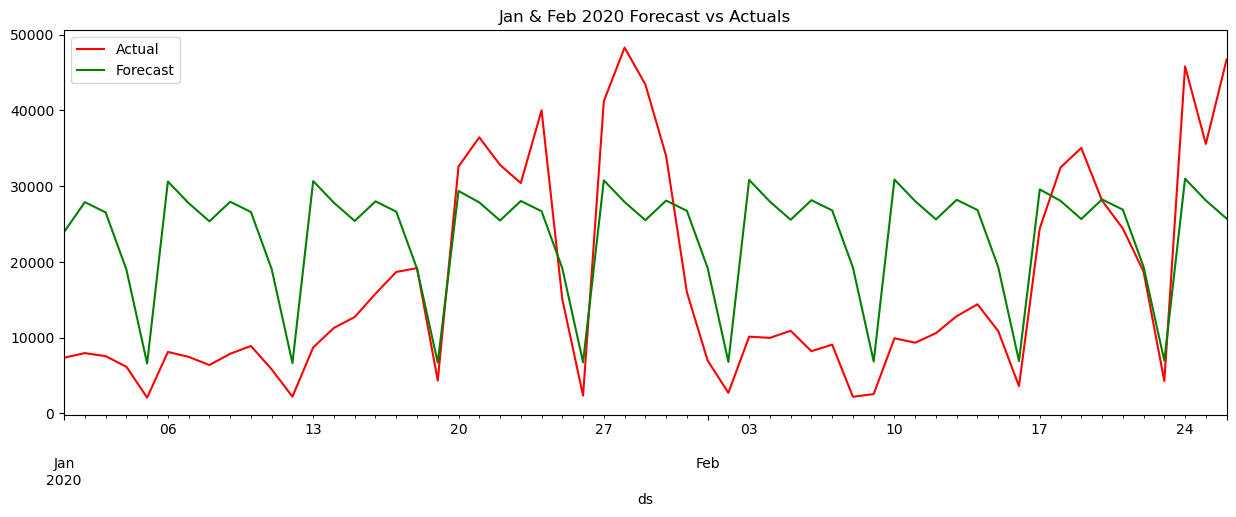

In [88]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
X_tst.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
X_tst_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Jan & Feb 2020 Forecast vs Actuals')
plt.show()

In [93]:
X_tst

,ds,y
699,2020-01-01,7353.6
700,2020-01-02,7959.7
701,2020-01-03,7559.3
702,2020-01-04,6162.3
703,2020-01-05,2085.9
704,2020-01-06,8120.0
705,2020-01-07,7464.4
706,2020-01-08,6385.6
707,2020-01-09,7873.0
708,2020-01-10,8899.9


In [94]:
#### HYPERPARAMETER TUNING 

In [108]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3],
              'holidays_prior_scale':[0.1,0.2,0.3],
              'n_changepoints' : [100,150]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 36


In [109]:
%%timeit
strt='2019-12-31'
end='2020-02-26'
model_parameters_list = []
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])

840 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [111]:
%%timeit
strt='2019-12-31'
end='2020-02-26'
model_parameters_list = []
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])

for p in grid:
    test = pd.DataFrame()
    print(p)
    random.seed(0)
    train_model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        holidays_prior_scale=p['holidays_prior_scale'],
        n_changepoints=p['n_changepoints'],
        seasonality_mode=p['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        holidays=holiday,
        interval_width=0.95
    )
    train_model.add_country_holidays(country_name='US')
    train_model.fit(X_tr)
    train_forecast = train_model.make_future_dataframe(periods=57, freq='D', include_history=False)
    train_forecast = train_model.predict(train_forecast)
    test = train_forecast[['ds', 'yhat']]
    Actual = df[(df['ds'] > strt) & (df['ds'] <= end)]
    MAPE = mean_absolute_percentage_error(Actual['y'], abs(test['yhat']))
    print('Mean Absolute Percentage Error (MAPE)------------------------------------', MAPE)
    model_parameters_list.append({'MAPE': MAPE, 'Parameters': p})
    model_parameters = pd.DataFrame(model_parameters_list)

print(model_parameters)






parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters.head()

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:08 - cmdstanpy - INFO - Chain [1] start processing
00:52:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:09 - cmdstanpy - INFO - Chain [1] start processing
00:52:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:09 - cmdstanpy - INFO - Chain [1] start processing
00:52:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:10 - cmdstanpy - INFO - Chain [1] start processing
00:52:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:11 - cmdstanpy - INFO - Chain [1] start processing
00:52:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:12 - cmdstanpy - INFO - Chain [1] start processing
00:52:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:13 - cmdstanpy - INFO - Chain [1] start processing
00:52:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:13 - cmdstanpy - INFO - Chain [1] start processing
00:52:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:14 - cmdstanpy - INFO - Chain [1] start processing
00:52:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:15 - cmdstanpy - INFO - Chain [1] start processing
00:52:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:15 - cmdstanpy - INFO - Chain [1] start processing
00:52:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:16 - cmdstanpy - INFO - Chain [1] start processing
00:52:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:17 - cmdstanpy - INFO - Chain [1] start processing
00:52:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:18 - cmdstanpy - INFO - Chain [1] start processing
00:52:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:18 - cmdstanpy - INFO - Chain [1] start processing
00:52:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:19 - cmdstanpy - INFO - Chain [1] start processing
00:52:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:20 - cmdstanpy - INFO - Chain [1] start processing
00:52:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:20 - cmdstanpy - INFO - Chain [1] start processing
00:52:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:21 - cmdstanpy - INFO - Chain [1] start processing
00:52:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:22 - cmdstanpy - INFO - Chain [1] start processing
00:52:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:22 - cmdstanpy - INFO - Chain [1] start processing
00:52:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:23 - cmdstanpy - INFO - Chain [1] start processing
00:52:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:24 - cmdstanpy - INFO - Chain [1] start processing
00:52:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:25 - cmdstanpy - INFO - Chain [1] start processing
00:52:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:25 - cmdstanpy - INFO - Chain [1] start processing
00:52:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:26 - cmdstanpy - INFO - Chain [1] start processing
00:52:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:27 - cmdstanpy - INFO - Chain [1] start processing
00:52:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:28 - cmdstanpy - INFO - Chain [1] start processing
00:52:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:28 - cmdstanpy - INFO - Chain [1] start processing
00:52:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:29 - cmdstanpy - INFO - Chain [1] start processing
00:52:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:30 - cmdstanpy - INFO - Chain [1] start processing
00:52:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:31 - cmdstanpy - INFO - Chain [1] start processing
00:52:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:31 - cmdstanpy - INFO - Chain [1] start processing
00:52:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:32 - cmdstanpy - INFO - Chain [1] start processing
00:52:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:33 - cmdstanpy - INFO - Chain [1] start processing
00:52:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:33 - cmdstanpy - INFO - Chain [1] start processing
00:52:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:52:34 - cmdstanpy - INFO - Chain [1] start processing
00:52:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:35 - cmdstanpy - INFO - Chain [1] start processing
00:52:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:36 - cmdstanpy - INFO - Chain [1] start processing
00:52:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:36 - cmdstanpy - INFO - Chain [1] start processing
00:52:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:37 - cmdstanpy - INFO - Chain [1] start processing
00:52:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:38 - cmdstanpy - INFO - Chain [1] start processing
00:52:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:39 - cmdstanpy - INFO - Chain [1] start processing
00:52:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:39 - cmdstanpy - INFO - Chain [1] start processing
00:52:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:40 - cmdstanpy - INFO - Chain [1] start processing
00:52:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:41 - cmdstanpy - INFO - Chain [1] start processing
00:52:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:42 - cmdstanpy - INFO - Chain [1] start processing
00:52:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:42 - cmdstanpy - INFO - Chain [1] start processing
00:52:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:43 - cmdstanpy - INFO - Chain [1] start processing
00:52:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:44 - cmdstanpy - INFO - Chain [1] start processing
00:52:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:45 - cmdstanpy - INFO - Chain [1] start processing
00:52:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:45 - cmdstanpy - INFO - Chain [1] start processing
00:52:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:46 - cmdstanpy - INFO - Chain [1] start processing
00:52:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:47 - cmdstanpy - INFO - Chain [1] start processing
00:52:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:47 - cmdstanpy - INFO - Chain [1] start processing
00:52:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:48 - cmdstanpy - INFO - Chain [1] start processing
00:52:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:49 - cmdstanpy - INFO - Chain [1] start processing
00:52:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:49 - cmdstanpy - INFO - Chain [1] start processing
00:52:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:50 - cmdstanpy - INFO - Chain [1] start processing
00:52:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:51 - cmdstanpy - INFO - Chain [1] start processing
00:52:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:51 - cmdstanpy - INFO - Chain [1] start processing
00:52:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:52 - cmdstanpy - INFO - Chain [1] start processing
00:52:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:53 - cmdstanpy - INFO - Chain [1] start processing
00:52:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:53 - cmdstanpy - INFO - Chain [1] start processing
00:52:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:54 - cmdstanpy - INFO - Chain [1] start processing
00:52:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:55 - cmdstanpy - INFO - Chain [1] start processing
00:52:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:55 - cmdstanpy - INFO - Chain [1] start processing
00:52:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:56 - cmdstanpy - INFO - Chain [1] start processing
00:52:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:52:57 - cmdstanpy - INFO - Chain [1] start processing
00:52:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:52:58 - cmdstanpy - INFO - Chain [1] start processing
00:52:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:52:58 - cmdstanpy - INFO - Chain [1] start processing
00:52:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:52:59 - cmdstanpy - INFO - Chain [1] start processing
00:52:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:53:00 - cmdstanpy - INFO - Chain [1] start processing
00:53:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:00 - cmdstanpy - INFO - Chain [1] start processing
00:53:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:01 - cmdstanpy - INFO - Chain [1] start processing
00:53:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:02 - cmdstanpy - INFO - Chain [1] start processing
00:53:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:03 - cmdstanpy - INFO - Chain [1] start processing
00:53:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:03 - cmdstanpy - INFO - Chain [1] start processing
00:53:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:04 - cmdstanpy - INFO - Chain [1] start processing
00:53:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:05 - cmdstanpy - INFO - Chain [1] start processing
00:53:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:06 - cmdstanpy - INFO - Chain [1] start processing
00:53:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:06 - cmdstanpy - INFO - Chain [1] start processing
00:53:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:07 - cmdstanpy - INFO - Chain [1] start processing
00:53:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:08 - cmdstanpy - INFO - Chain [1] start processing
00:53:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:09 - cmdstanpy - INFO - Chain [1] start processing
00:53:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:09 - cmdstanpy - INFO - Chain [1] start processing
00:53:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:10 - cmdstanpy - INFO - Chain [1] start processing
00:53:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:11 - cmdstanpy - INFO - Chain [1] start processing
00:53:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:11 - cmdstanpy - INFO - Chain [1] start processing
00:53:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:12 - cmdstanpy - INFO - Chain [1] start processing
00:53:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:13 - cmdstanpy - INFO - Chain [1] start processing
00:53:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:14 - cmdstanpy - INFO - Chain [1] start processing
00:53:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:14 - cmdstanpy - INFO - Chain [1] start processing
00:53:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:15 - cmdstanpy - INFO - Chain [1] start processing
00:53:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:16 - cmdstanpy - INFO - Chain [1] start processing
00:53:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:16 - cmdstanpy - INFO - Chain [1] start processing
00:53:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:17 - cmdstanpy - INFO - Chain [1] start processing
00:53:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:18 - cmdstanpy - INFO - Chain [1] start processing
00:53:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:19 - cmdstanpy - INFO - Chain [1] start processing
00:53:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:19 - cmdstanpy - INFO - Chain [1] start processing
00:53:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:20 - cmdstanpy - INFO - Chain [1] start processing
00:53:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:21 - cmdstanpy - INFO - Chain [1] start processing
00:53:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:21 - cmdstanpy - INFO - Chain [1] start processing
00:53:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:22 - cmdstanpy - INFO - Chain [1] start processing
00:53:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:23 - cmdstanpy - INFO - Chain [1] start processing
00:53:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:24 - cmdstanpy - INFO - Chain [1] start processing
00:53:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:24 - cmdstanpy - INFO - Chain [1] start processing
00:53:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:25 - cmdstanpy - INFO - Chain [1] start processing
00:53:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:53:26 - cmdstanpy - INFO - Chain [1] start processing
00:53:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:27 - cmdstanpy - INFO - Chain [1] start processing
00:53:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:27 - cmdstanpy - INFO - Chain [1] start processing
00:53:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:28 - cmdstanpy - INFO - Chain [1] start processing
00:53:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:29 - cmdstanpy - INFO - Chain [1] start processing
00:53:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:30 - cmdstanpy - INFO - Chain [1] start processing
00:53:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:30 - cmdstanpy - INFO - Chain [1] start processing
00:53:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:31 - cmdstanpy - INFO - Chain [1] start processing
00:53:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:32 - cmdstanpy - INFO - Chain [1] start processing
00:53:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:32 - cmdstanpy - INFO - Chain [1] start processing
00:53:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:33 - cmdstanpy - INFO - Chain [1] start processing
00:53:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:34 - cmdstanpy - INFO - Chain [1] start processing
00:53:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:34 - cmdstanpy - INFO - Chain [1] start processing
00:53:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:35 - cmdstanpy - INFO - Chain [1] start processing
00:53:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:36 - cmdstanpy - INFO - Chain [1] start processing
00:53:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:37 - cmdstanpy - INFO - Chain [1] start processing
00:53:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:37 - cmdstanpy - INFO - Chain [1] start processing
00:53:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:38 - cmdstanpy - INFO - Chain [1] start processing
00:53:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:39 - cmdstanpy - INFO - Chain [1] start processing
00:53:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:39 - cmdstanpy - INFO - Chain [1] start processing
00:53:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:40 - cmdstanpy - INFO - Chain [1] start processing
00:53:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:41 - cmdstanpy - INFO - Chain [1] start processing
00:53:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:41 - cmdstanpy - INFO - Chain [1] start processing
00:53:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:42 - cmdstanpy - INFO - Chain [1] start processing
00:53:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:43 - cmdstanpy - INFO - Chain [1] start processing
00:53:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:43 - cmdstanpy - INFO - Chain [1] start processing
00:53:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:44 - cmdstanpy - INFO - Chain [1] start processing
00:53:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:45 - cmdstanpy - INFO - Chain [1] start processing
00:53:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:46 - cmdstanpy - INFO - Chain [1] start processing
00:53:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:46 - cmdstanpy - INFO - Chain [1] start processing
00:53:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:47 - cmdstanpy - INFO - Chain [1] start processing
00:53:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:48 - cmdstanpy - INFO - Chain [1] start processing
00:53:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:48 - cmdstanpy - INFO - Chain [1] start processing
00:53:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:49 - cmdstanpy - INFO - Chain [1] start processing
00:53:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:50 - cmdstanpy - INFO - Chain [1] start processing
00:53:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:51 - cmdstanpy - INFO - Chain [1] start processing
00:53:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:53:51 - cmdstanpy - INFO - Chain [1] start processing
00:53:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:52 - cmdstanpy - INFO - Chain [1] start processing
00:53:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:53 - cmdstanpy - INFO - Chain [1] start processing
00:53:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:53 - cmdstanpy - INFO - Chain [1] start processing
00:53:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:54 - cmdstanpy - INFO - Chain [1] start processing
00:53:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:55 - cmdstanpy - INFO - Chain [1] start processing
00:53:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:55 - cmdstanpy - INFO - Chain [1] start processing
00:53:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:56 - cmdstanpy - INFO - Chain [1] start processing
00:53:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:53:57 - cmdstanpy - INFO - Chain [1] start processing
00:53:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:53:58 - cmdstanpy - INFO - Chain [1] start processing
00:53:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:53:58 - cmdstanpy - INFO - Chain [1] start processing
00:53:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:53:59 - cmdstanpy - INFO - Chain [1] start processing
00:53:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:00 - cmdstanpy - INFO - Chain [1] start processing
00:54:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:00 - cmdstanpy - INFO - Chain [1] start processing
00:54:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:01 - cmdstanpy - INFO - Chain [1] start processing
00:54:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:02 - cmdstanpy - INFO - Chain [1] start processing
00:54:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:02 - cmdstanpy - INFO - Chain [1] start processing
00:54:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:03 - cmdstanpy - INFO - Chain [1] start processing
00:54:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:04 - cmdstanpy - INFO - Chain [1] start processing
00:54:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:05 - cmdstanpy - INFO - Chain [1] start processing
00:54:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:05 - cmdstanpy - INFO - Chain [1] start processing
00:54:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:06 - cmdstanpy - INFO - Chain [1] start processing
00:54:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:06 - cmdstanpy - INFO - Chain [1] start processing
00:54:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:07 - cmdstanpy - INFO - Chain [1] start processing
00:54:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:08 - cmdstanpy - INFO - Chain [1] start processing
00:54:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:09 - cmdstanpy - INFO - Chain [1] start processing
00:54:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:09 - cmdstanpy - INFO - Chain [1] start processing
00:54:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:10 - cmdstanpy - INFO - Chain [1] start processing
00:54:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:11 - cmdstanpy - INFO - Chain [1] start processing
00:54:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:12 - cmdstanpy - INFO - Chain [1] start processing
00:54:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:12 - cmdstanpy - INFO - Chain [1] start processing
00:54:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:13 - cmdstanpy - INFO - Chain [1] start processing
00:54:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:14 - cmdstanpy - INFO - Chain [1] start processing
00:54:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:14 - cmdstanpy - INFO - Chain [1] start processing
00:54:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:15 - cmdstanpy - INFO - Chain [1] start processing
00:54:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:16 - cmdstanpy - INFO - Chain [1] start processing
00:54:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:54:16 - cmdstanpy - INFO - Chain [1] start processing
00:54:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:17 - cmdstanpy - INFO - Chain [1] start processing
00:54:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:18 - cmdstanpy - INFO - Chain [1] start processing
00:54:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:19 - cmdstanpy - INFO - Chain [1] start processing
00:54:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:19 - cmdstanpy - INFO - Chain [1] start processing
00:54:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:20 - cmdstanpy - INFO - Chain [1] start processing
00:54:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:21 - cmdstanpy - INFO - Chain [1] start processing
00:54:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:21 - cmdstanpy - INFO - Chain [1] start processing
00:54:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:22 - cmdstanpy - INFO - Chain [1] start processing
00:54:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:23 - cmdstanpy - INFO - Chain [1] start processing
00:54:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:24 - cmdstanpy - INFO - Chain [1] start processing
00:54:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:24 - cmdstanpy - INFO - Chain [1] start processing
00:54:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:25 - cmdstanpy - INFO - Chain [1] start processing
00:54:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:26 - cmdstanpy - INFO - Chain [1] start processing
00:54:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:26 - cmdstanpy - INFO - Chain [1] start processing
00:54:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:27 - cmdstanpy - INFO - Chain [1] start processing
00:54:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:28 - cmdstanpy - INFO - Chain [1] start processing
00:54:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:28 - cmdstanpy - INFO - Chain [1] start processing
00:54:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:29 - cmdstanpy - INFO - Chain [1] start processing
00:54:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:30 - cmdstanpy - INFO - Chain [1] start processing
00:54:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:30 - cmdstanpy - INFO - Chain [1] start processing
00:54:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:31 - cmdstanpy - INFO - Chain [1] start processing
00:54:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:32 - cmdstanpy - INFO - Chain [1] start processing
00:54:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:32 - cmdstanpy - INFO - Chain [1] start processing
00:54:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:33 - cmdstanpy - INFO - Chain [1] start processing
00:54:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:34 - cmdstanpy - INFO - Chain [1] start processing
00:54:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:35 - cmdstanpy - INFO - Chain [1] start processing
00:54:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:35 - cmdstanpy - INFO - Chain [1] start processing
00:54:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:36 - cmdstanpy - INFO - Chain [1] start processing
00:54:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:37 - cmdstanpy - INFO - Chain [1] start processing
00:54:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:37 - cmdstanpy - INFO - Chain [1] start processing
00:54:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:38 - cmdstanpy - INFO - Chain [1] start processing
00:54:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:39 - cmdstanpy - INFO - Chain [1] start processing
00:54:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:40 - cmdstanpy - INFO - Chain [1] start processing
00:54:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:40 - cmdstanpy - INFO - Chain [1] start processing
00:54:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:41 - cmdstanpy - INFO - Chain [1] start processing
00:54:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:54:42 - cmdstanpy - INFO - Chain [1] start processing
00:54:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:42 - cmdstanpy - INFO - Chain [1] start processing
00:54:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:43 - cmdstanpy - INFO - Chain [1] start processing
00:54:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:44 - cmdstanpy - INFO - Chain [1] start processing
00:54:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:45 - cmdstanpy - INFO - Chain [1] start processing
00:54:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:45 - cmdstanpy - INFO - Chain [1] start processing
00:54:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:46 - cmdstanpy - INFO - Chain [1] start processing
00:54:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:47 - cmdstanpy - INFO - Chain [1] start processing
00:54:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:47 - cmdstanpy - INFO - Chain [1] start processing
00:54:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:48 - cmdstanpy - INFO - Chain [1] start processing
00:54:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:49 - cmdstanpy - INFO - Chain [1] start processing
00:54:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:50 - cmdstanpy - INFO - Chain [1] start processing
00:54:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:50 - cmdstanpy - INFO - Chain [1] start processing
00:54:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:51 - cmdstanpy - INFO - Chain [1] start processing
00:54:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:52 - cmdstanpy - INFO - Chain [1] start processing
00:54:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:52 - cmdstanpy - INFO - Chain [1] start processing
00:54:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:53 - cmdstanpy - INFO - Chain [1] start processing
00:54:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:54 - cmdstanpy - INFO - Chain [1] start processing
00:54:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:54 - cmdstanpy - INFO - Chain [1] start processing
00:54:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:55 - cmdstanpy - INFO - Chain [1] start processing
00:54:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:56 - cmdstanpy - INFO - Chain [1] start processing
00:54:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:54:57 - cmdstanpy - INFO - Chain [1] start processing
00:54:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:54:57 - cmdstanpy - INFO - Chain [1] start processing
00:54:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:54:58 - cmdstanpy - INFO - Chain [1] start processing
00:54:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:54:59 - cmdstanpy - INFO - Chain [1] start processing
00:54:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:00 - cmdstanpy - INFO - Chain [1] start processing
00:55:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:00 - cmdstanpy - INFO - Chain [1] start processing
00:55:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:01 - cmdstanpy - INFO - Chain [1] start processing
00:55:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:02 - cmdstanpy - INFO - Chain [1] start processing
00:55:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:03 - cmdstanpy - INFO - Chain [1] start processing
00:55:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:04 - cmdstanpy - INFO - Chain [1] start processing
00:55:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:04 - cmdstanpy - INFO - Chain [1] start processing
00:55:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:05 - cmdstanpy - INFO - Chain [1] start processing
00:55:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:06 - cmdstanpy - INFO - Chain [1] start processing
00:55:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:06 - cmdstanpy - INFO - Chain [1] start processing
00:55:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:07 - cmdstanpy - INFO - Chain [1] start processing
00:55:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

00:55:08 - cmdstanpy - INFO - Chain [1] start processing
00:55:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.048427616655076
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:09 - cmdstanpy - INFO - Chain [1] start processing
00:55:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0569220833739117
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:09 - cmdstanpy - INFO - Chain [1] start processing
00:55:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0485404832431593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:10 - cmdstanpy - INFO - Chain [1] start processing
00:55:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.051006070707023
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:11 - cmdstanpy - INFO - Chain [1] start processing
00:55:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0467803165842264
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:12 - cmdstanpy - INFO - Chain [1] start processing
00:55:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0406755779040915
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:12 - cmdstanpy - INFO - Chain [1] start processing
00:55:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0484047471981084
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:13 - cmdstanpy - INFO - Chain [1] start processing
00:55:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.052355799555911
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:14 - cmdstanpy - INFO - Chain [1] start processing
00:55:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0229337695646
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:15 - cmdstanpy - INFO - Chain [1] start processing
00:55:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040444143251308
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:15 - cmdstanpy - INFO - Chain [1] start processing
00:55:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0475761441151659
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:16 - cmdstanpy - INFO - Chain [1] start processing
00:55:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0230012927072702
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:17 - cmdstanpy - INFO - Chain [1] start processing
00:55:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.087486315452851
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:18 - cmdstanpy - INFO - Chain [1] start processing
00:55:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0400395867504388
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:19 - cmdstanpy - INFO - Chain [1] start processing
00:55:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0491786105036365
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:19 - cmdstanpy - INFO - Chain [1] start processing
00:55:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040659539056356
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:20 - cmdstanpy - INFO - Chain [1] start processing
00:55:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0517509913597822
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:21 - cmdstanpy - INFO - Chain [1] start processing
00:55:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0369325799693783
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:21 - cmdstanpy - INFO - Chain [1] start processing
00:55:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0539611006312835
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:22 - cmdstanpy - INFO - Chain [1] start processing
00:55:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0350877561592327
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:23 - cmdstanpy - INFO - Chain [1] start processing
00:55:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.041218822626022
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:24 - cmdstanpy - INFO - Chain [1] start processing
00:55:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0331455319227432
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:24 - cmdstanpy - INFO - Chain [1] start processing
00:55:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0152904703733416
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:26 - cmdstanpy - INFO - Chain [1] start processing
00:55:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0342608943055405
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:26 - cmdstanpy - INFO - Chain [1] start processing
00:55:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0506836743049468
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:27 - cmdstanpy - INFO - Chain [1] start processing
00:55:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.053337422252919
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:28 - cmdstanpy - INFO - Chain [1] start processing
00:55:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0602985545160513
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:29 - cmdstanpy - INFO - Chain [1] start processing
00:55:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0402133828000186
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:29 - cmdstanpy - INFO - Chain [1] start processing
00:55:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0401332546297748
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:30 - cmdstanpy - INFO - Chain [1] start processing
00:55:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027107783279349
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:31 - cmdstanpy - INFO - Chain [1] start processing
00:55:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0487308985070614
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:32 - cmdstanpy - INFO - Chain [1] start processing
00:55:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.044627120215013
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


00:55:32 - cmdstanpy - INFO - Chain [1] start processing
00:55:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.027606400461738
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


00:55:33 - cmdstanpy - INFO - Chain [1] start processing
00:55:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0850628337267472
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


00:55:34 - cmdstanpy - INFO - Chain [1] start processing
00:55:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.040136404506416
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


00:55:35 - cmdstanpy - INFO - Chain [1] start processing
00:55:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE)------------------------------------ 1.0423049600213121
        MAPE                                         Parameters
0   1.048428  {'changepoint_prior_scale': 0.1, 'holidays_pri...
1   1.056922  {'changepoint_prior_scale': 0.1, 'holidays_pri...
2   1.048540  {'changepoint_prior_scale': 0.1, 'holidays_pri...
3   1.051006  {'changepoint_prior_scale': 0.1, 'holidays_pri...
4   1.046780  {'changepoint_prior_scale': 0.1, 'holidays_pri...
5   1.040676  {'changepoint_prior_scale': 0.1, 'holidays_pri...
6   1.048405  {'changepoint_prior_scale': 0.1, 'holidays_pri...
7   1.052356  {'changepoint_prior_scale': 0.1, 'holidays_pri...
8   1.022934  {'changepoint_prior_scale': 0.1, 'holidays_pri...
9   1.040444  {'changepoint_prior_scale': 0.1, 'holidays_pri...
10  1.047576  {'changepoint_prior_scale': 0.1, 'holidays_pri...
11  1.023001  {'changepoint_prior_scale': 0.1, 'holidays_pri...
12  1.087486  {'changepoint_prior_scale': 0.2, 'holidays_pri...
13  1.04004

 n_changepoints is the number of change happen in the data. Prophet model detects them by its own. By default, its value is 25, which are uniformly placed in the first 80% of the time series. Changing n_changepoints can add value to the model.

 changepoint_prior_scale to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If you make it high it will be more flexible, but you can end up overfitting. By default, this parameter is set to 0.05

 seasonality_mode There are 2 types model seasonality mode. Additive & multiplicaticative. By default Prophet fits additive seasonalities, meaning the effect of the seasonality is added to the trend to get the forecast. Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the model.

 holiday_prior_scale just like changepoint_prior_scale, holiday_prior_scale is used to smoothning the effect of holidays. By default its value is 10, which provides very little regularization. Reducing this parameter dampens holiday effects

 Seasonalities with fourier_order Prophet model, by default finds the seasonalities and adds the default parameters of the seasonality. We can modify the seasonalities effect by adding custom seasonalities as add_seasonality in the model with different fourier order.Yy default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality.
 seasonality_weekly / seasonality_weekly = True / Fl